# Applied Deep Learning - ass#1
Carnegie Mellon University

@msahinoz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
x = np.random.rand(1000, 1)
a = 3
b = 5
noise = np.random.normal(0, 0.1, size=(1000, 1))
y = a * x + b + noise

sklearn linear regression:

sklearn r2_sk: 0.9862385742053597


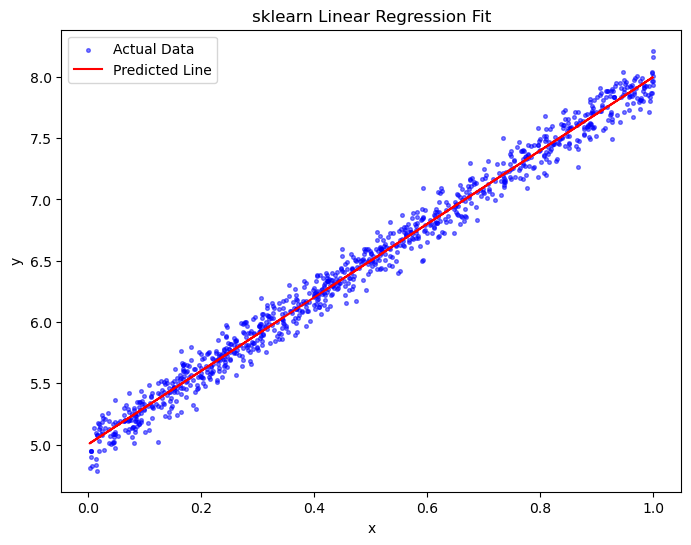

Coefficient: 2.9957412887118844, Bias: 5.00371476742024


In [3]:
sk_model = LinearRegression()
sk_model.fit(x, y)
y_pred = sk_model.predict(x)
r2_sk = r2_score(y, y_pred)
print(f"sklearn r2_sk: {r2_sk}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data', alpha=0.5, s=7)
plt.plot(x, y_pred, color='red', label='Predicted Line')
plt.title('sklearn Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Coefficient: {sk_model.coef_[0][0]}, Bias: {sk_model.intercept_[0]}")

2025-03-25 19:29:30.920860: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 304us/step
tensorflow r2_tf: 0.986214431254906


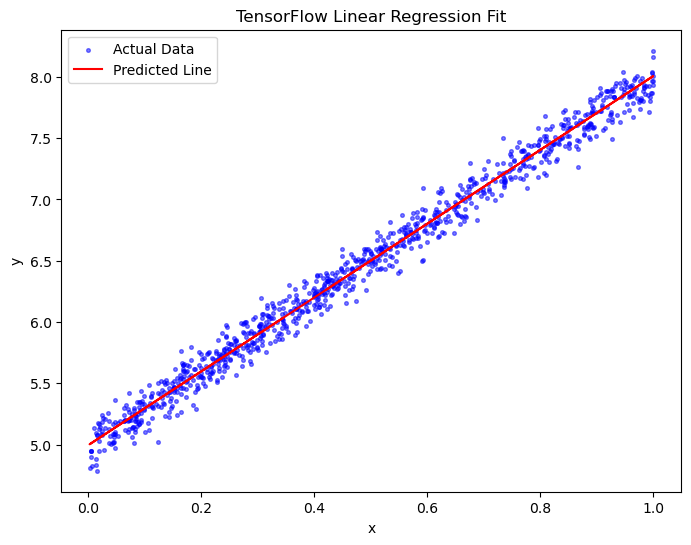

Weight: 3.010545253753662, Bias: 4.996408939361572


In [4]:
tf_model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])
tf_model.compile(optimizer='adam', loss='mean_squared_error')
tf_model.fit(x, y, epochs=400, verbose=0) # play with epochs
y_pred = tf_model.predict(x)
r2_tf = r2_score(y, y_pred)
print(f"tensorflow r2_tf: {r2_tf}")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data', alpha=0.5, s=7)
plt.plot(x, y_pred, color='red', label='Predicted Line')
plt.title('TensorFlow Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

tf_weight, tf_bias = tf_model.layers[0].get_weights()
print(f"Weight: {tf_weight[0][0]}, Bias: {tf_bias[0]}")

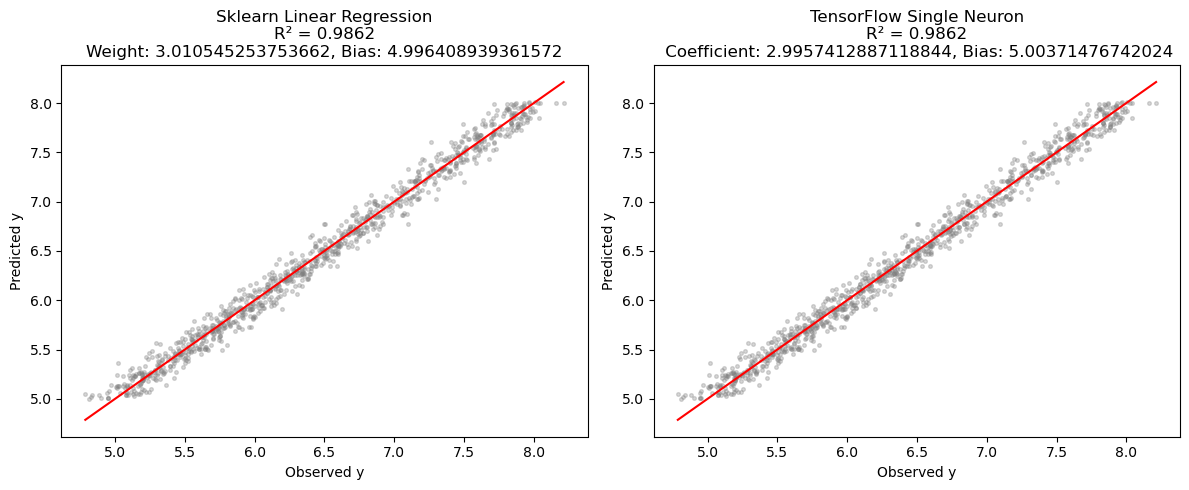

(3.0105453, 4.996409, 2.9957412887118844, 5.00371476742024)

In [6]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({
    "x": x.flatten(),
    "y_true": y.flatten(),
    "y_pred_sklearn": y_pred.flatten(),
    "y_pred_tf": y_pred.flatten()
})

# Plot observed vs predicted for sklearn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.3, s=7, color = 'gray')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title(f'Sklearn Linear Regression\nR² = {r2_sk:.4f}\nWeight: {tf_weight[0][0]}, Bias: {tf_bias[0]}')
plt.xlabel('Observed y')
plt.ylabel('Predicted y')

# Plot observed vs predicted for tensorflow
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.3, s=7, color = 'gray')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title(f'TensorFlow Single Neuron\nR² = {r2_tf:.4f}\n Coefficient: {sk_model.coef_[0][0]}, Bias: {sk_model.intercept_[0]}')
plt.xlabel('Observed y')
plt.ylabel('Predicted y')

plt.tight_layout()
plt.show()
(tf_weight[0][0], tf_bias[0], sk_model.coef_[0][0], sk_model.intercept_[0])
